In [32]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

In [3]:
data=pd.read_csv("train.csv")
data.head(-1)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


In [63]:
#voir les différentes valuers des colonnes
data["keyword"].unique()
data["location"].unique()
data.iloc[0]['id']
data["keyword"].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [16]:
#essaie de mettre les données dans un dictionnaire 
#id peut servira comme une clé primmaire
dictionnaire={}
for i in  range(7611):
    dictionnaire[data.iloc[i]['id']]=[data.iloc[0]['keyword'],data.iloc[i]['location'],data.iloc[i]['text'],data.iloc[i]['target']]
    


In [18]:
#display an element of the dictionnary to validat the previous step
dictionnaire[4]

[nan, nan, 'Forest fire near La Ronge Sask. Canada', 1]

In [22]:
tokenizer = nltk.word_tokenize

nltk.download('stopwords')
nltk.download('punkt')  # If you haven't downloaded punkt tokenizer before
nltk.download('snowball_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package snowball_data to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


True

In [24]:
liste_mots=tokenizer(dictionnaire[4][2])
print(len(liste_mots))

8


In [33]:
#define a stemming function
#this function is doing stemming and deleting stopwords
def stem_text(text, language='english'):
    stemmer = SnowballStemmer(language)
    stop_words = set(stopwords.words(language))
    words = tokenizer(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    return " ".join(stemmed_words)

In [35]:
#try this stemming function

transformed_text=stem_text(dictionnaire[4][2])
print(transformed_text)

forest fire near la rong sask . canada


In [36]:
#apply the stemmer for all texts
for i in  range(7611):
    dictionnaire[data.iloc[i]['id']][2]=stem_text(dictionnaire[data.iloc[i]['id']][2])
    

In [37]:
#check
print(data.iloc[3]['text'])
transformed_text=stem_text(dictionnaire[6][2])
print(transformed_text)
#ok

13,000 people receive #wildfires evacuation orders in California 
13,000 peopl receiv # wildfir evacu order california


In [38]:
#Up to this point, we have effectively organized and cleaned our data.

In [45]:
#on va essayer de construire une liste de texte qui ont pour target 1 pour pouvoir étudier les mots qui se répétent 
#la liste seroa de la forme [(id1, text1),(id2, text2),.....]
list_text_pos_targ=[]
for i in range(7611):
    id=data.iloc[i]['id']
    text=dictionnaire[id][2]
    target=dictionnaire[id][3]
    if target==1:
        list_text_pos_targ.append((id,text))
     

In [46]:
#check
print(list_text_pos_targ[7])
#ok

(13, "'m top hill see fire wood ...")


In [43]:
print(list_text_pos_targ)
#en regradant le texte il me parait qui'il y'a des pnctuation et des caractère indésirabl donc je vais essayer de les supprimer


[(1, 'deed reason # earthquak may allah forgiv us'), (4, 'forest fire near la rong sask . canada'), (5, "resid ask shelter place ' notifi offic . evacu shelter place order expect"), (6, '13,000 peopl receiv # wildfir evacu order california'), (7, 'got sent photo rubi # alaska smoke # wildfir pour school'), (8, '# rockyfir updat = > california hwi . 20 close direct due lake counti fire - # cafir # wildfir'), (10, '# flood # disast heavi rain caus flash flood street manitou , colorado spring area'), (13, "'m top hill see fire wood ..."), (14, "'s emerg evacu happen build across street"), (15, "'m afraid tornado come area ..."), (16, 'three peopl die heat wave far'), (17, 'haha south tampa get flood hah- wait second live south tampa gon na gon na fvck # flood'), (18, '# rain # flood # florida # tampabay # tampa 18 19 day . ve lost count'), (19, '# flood bago myanmar # arriv bago'), (20, 'damag school bus 80 multi car crash # break'), (48, '@ bbcmtd wholesal market ablaz http : //t.co/lhyx

In [48]:
def delete_mini_words(text):
    words_list=tokenizer(text)
    for word in words_list:
        if len(word)<3:
            words_list.remove(word)
    return  " ".join(words_list)

In [50]:
list_modified=[]
for element in list_text_pos_targ:
    id=element[0]
    text_modified=delete_mini_words(element[1])
    list_modified.append((id,text_modified))

In [51]:
print(list_modified)

[(1, 'deed reason earthquak may allah forgiv'), (4, 'forest fire near rong sask canada'), (5, 'resid ask shelter place notifi offic evacu shelter place order expect'), (6, '13,000 peopl receiv wildfir evacu order california'), (7, 'got sent photo rubi alaska smoke wildfir pour school'), (8, 'rockyfir updat > california hwi 20 close direct due lake counti fire cafir # wildfir'), (10, 'flood disast heavi rain caus flash flood street manitou colorado spring area'), (13, 'top hill see fire wood ...'), (14, 'emerg evacu happen build across street'), (15, 'afraid tornado come area ...'), (16, 'three peopl die heat wave far'), (17, 'haha south tampa get flood hah- wait second live south tampa gon gon fvck flood'), (18, 'rain flood florida tampabay tampa 19 day ve lost count'), (19, 'flood bago myanmar arriv bago'), (20, 'damag school bus multi car crash break'), (48, 'bbcmtd wholesal market ablaz http //t.co/lhyxeohy6c'), (50, 'africanbaz break news nigeria flag set ablaz aba http //t.co/2nnd

In [ ]:
key_words['accid','die',"injuri",'horribl','omg','crash',"hit"]
#on peut aussi concaténer keyword des lignes dont le target vaut 1 à conditions de les faire passer par le stemming pour qu'ils 
#subissent les même transfos que le text orig (les racines des mots)


In [89]:
#on peut concaténer tout le texte pour voir la fréquence de chaque mot dans le texte et tirer par la suite les différents mots clé
key_words_dictionnary={}
global_text=''
for element in list_modified:
    global_text+=element[1]
list_words_global_text=tokenizer(global_text)
for word in list_words_global_text:
    if word in ['http','...','?','#','https',"n't",'@','!','-','get',':','.']:
        pass
    else:
        key_words_dictionnary[word]=0 # initiliser le dictionnaire
for word in list_words_global_text:
    if word in ['http','...','?','#','https',"n't",'@','!','-','get',":",'.']:
        pass
    else:
        key_words_dictionnary[word]+=1
        

In [177]:
sorted_occurrences = sorted(key_words_dictionnary.items(), key=lambda x: x[1], reverse=True)

# Obtenez les 10 mots les plus répandus
top_60_words = sorted_occurrences[:50]
print(top_60_words)

[('fire', 239), ('bomb', 170), ('kill', 152), ('amp', 135), ('via', 120), ('crash', 109), ('disast', 106), ('attack', 103), ('train', 101), ('news', 99), ('home', 99), ('peopl', 98), ('flood', 98), ('california', 92), ('build', 91), ('suicid', 90), ('like', 88), ('evacu', 87), ('fatal', 87), ('polic', 84), ('famili', 82), ('derail', 82), ('storm', 80), ('burn', 77), ('hiroshima', 76), ('wildfir', 74), ('emerg', 70), ('report', 69), ('say', 68), ('nuclear', 68), ('live', 67), ('car', 66), ('collaps', 66), ('accid', 64), ('mh370', 64), ('northern', 63), ('caus', 62), ('dead', 61), ('one', 60), ('bomber', 60), ('near', 59), ('warn', 59), ('war', 59), ('legionnair', 59), ('confirm', 58), ('two', 57), ('year', 57), ('atom', 57), ('death', 56), ('murder', 54)]


In [126]:
# je vais essayer de travailler sur les keywords présente dna sle tableau initile et voir l'intersection de ces éléments 
#cvec le dictionnaire constuit dans la requête précédente
# on rapplle la structure du dictionnaire des données initiale {'id':["keyword","location","text","target"],...}
list_keywords=[]
for i in  range(7611):
    if data.iloc[i]['target']==1:
        list_keywords.append(data.iloc[i]['keyword'])
    
print(list_keywords)
    

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'ablaze', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 'airplane%20accident', 

In [102]:
# on va essaye  de stemmer les mots cotenues dans list_keywords afin qu'ils soient semblant aux mots contenus dans key_words_dictionnary
stemmer = SnowballStemmer('english')
stemmed_words = [stemmer.stem(str(word)) for word in list_keywords]
stemmed_words.remove('nan')
while 'nan' in stemmed_words:
    stemmed_words.remove('nan')
print(stemmed_words)

['ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'ablaz', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'airplane%20accid', 'ambul', 'ambul', 'ambul', 'ambul', 'ambul', 'ambul', 'ambul', 'am

In [179]:
#préparer les deux lists qui serviront de bon features pour la data test
#première liste: liste des keywords
keywords_final_list=stemmed_words
#deuxième liste: liste lde smots les plus répandus dans le texte
top_words=[element[0]for element in top_60_words]
print(top_words)


['fire', 'bomb', 'kill', 'amp', 'via', 'crash', 'disast', 'attack', 'train', 'news', 'home', 'peopl', 'flood', 'california', 'build', 'suicid', 'like', 'evacu', 'fatal', 'polic', 'famili', 'derail', 'storm', 'burn', 'hiroshima', 'wildfir', 'emerg', 'report', 'say', 'nuclear', 'live', 'car', 'collaps', 'accid', 'mh370', 'northern', 'caus', 'dead', 'one', 'bomber', 'near', 'warn', 'war', 'legionnair', 'confirm', 'two', 'year', 'atom', 'death', 'murder']


In [119]:
#appload data test
data_test=pd.read_csv('test.csv')
data_test.head()
data_test.shape
sample_submissions=pd.read_csv('sample_submission.csv')
data_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [135]:
#data prediction
#il faut faire le même travail sur le datatest pour le transformer au meme format des listes qui serviront pour la prédiction

#je veais essayer de stemmer en stockant les valeurs
dictionnaire_test={}
for i in range(3263):
    dictionnaire_test[data_test.iloc[i]['id']]=[stem_text(str(data_test.iloc[i]['keyword'])),data_test.iloc[i]['location'],stem_text(data_test.iloc[i]['text'])]
print(dictionnaire_test) 
    
    

{0: ['nan', nan, 'happen terribl car crash'], 2: ['nan', nan, 'heard # earthquak differ citi , stay safe everyon .'], 3: ['nan', nan, 'forest fire spot pond , gees flee across street , save'], 9: ['nan', nan, 'apocalyps light . # spokan # wildfir'], 11: ['nan', nan, 'typhoon soudelor kill 28 china taiwan'], 12: ['nan', nan, "re shake ... 's earthquak"], 21: ['nan', nan, "'d probabl still show life arsenal yesterday , eh ? eh ?"], 22: ['nan', nan, 'hey ! ?'], 27: ['nan', nan, 'nice hat ?'], 29: ['nan', nan, 'fuck !'], 30: ['nan', nan, "n't like cold !"], 35: ['nan', nan, "nooooooooo ! n't !"], 42: ['nan', nan, "n't tell !"], 43: ['nan', nan, '? !'], 45: ['nan', nan, 'awesom !'], 46: ['ablaz', 'London', "birmingham wholesal market ablaz bbc news - fire break birmingham 's wholesal market http : //t.co/irwqcezweu"], 47: ['ablaz', "Niall's place | SAF 12 SQUAD |", '@ sunkxssedharri wear short race ablaz ?'], 51: ['ablaz', 'NIGERIA', '# previouslyondoyintv : toke makinwa\x89ûª marriag crisi

In [185]:
def reset_params(top_number):
    top_words=[element[0]for element in top_60_words[:top_number]]
    return top_words

In [189]:
print(reset_params(15))

['fire', 'bomb', 'kill', 'amp', 'via', 'crash', 'disast', 'attack', 'train', 'news', 'home', 'peopl', 'flood', 'california', 'build']


In [175]:
#prediction
y_pred=[]
dictionnaire_test_1=dictionnaire_test
for i in range(3263):
    id=data_test.iloc[i]['id']
    keyword=dictionnaire_test[id][0]
    text=dictionnaire_test[id][2]
    score_text=0
    for word in top_words:
        if word in text :
            score_text+=1
            
    if  score_text>=1:
        dictionnaire_test_1[id].append(1)
    else:
        dictionnaire_test_1[id].append(0)
    y_pred.append(dictionnaire_test_1[id][-1])
print(dictionnaire_test_1)

{0: ['nan', nan, 'happen terribl car crash', 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 2: ['nan', nan, 'heard # earthquak differ citi , stay safe everyon .', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 3: ['nan', nan, 'forest fire spot pond , gees flee across street , save', 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 9: ['nan', nan, 'apocalyps light . # spokan # wildfir', 1, 1, 1, 0, 1, 1, 1, 0, 0, 0], 11: ['nan', nan, 'typhoon soudelor kill 28 china taiwan', 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], 12: ['nan', nan, "re shake ... 's earthquak", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 21: ['nan', nan, "'d probabl still show life arsenal yesterday , eh ? eh ?", 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 22: ['nan', nan, 'hey ! ?', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 27: ['nan', nan, 'nice hat ?', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 29: ['nan', nan, 'fuck !', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 30: ['nan', nan, "n't like cold !", 1, 1, 1, 0, 1, 1, 1, 1, 0, 0], 35: ['nan', nan, "nooooooooo ! n't !", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 42: ['nan', nan, "n't tell !", 0, 0, 0, 

In [176]:
y=list(sample_submissions['target'])
from sklearn.metrics import mean_absolute_error
error=mean_absolute_error(y,y_pred)
print("accuracy",(1-error)*100,'%')
#erreur assez grande, essaies de développer

accuracy 73.61323935029114 %


In [198]:

def reset_prediction(top_number):
    y_pred=[]
    dictionnaire_test_1=dictionnaire_test
    for i in range(3263):
        id=data_test.iloc[i]['id']
        keyword=dictionnaire_test[id][0]
        text=dictionnaire_test[id][2]
        score_text=0
        for word in reset_params(top_number):
            if word in text :
                score_text+=1

        if  score_text>=1:
            dictionnaire_test_1[id].append(1)
        else:
            dictionnaire_test_1[id].append(0)
        y_pred.append(dictionnaire_test_1[id][-1])
    return y_pred

 


In [205]:
def calcul_error(top_number):
    reset_prediction(top_number)
    error=mean_absolute_error(y,reset_prediction(top_number))
    return error


In [206]:
top_numbers=[1,2,3,4,5,6,7,10,11,13,15,20]
errors=[calcul_error(number) for number in top_numbers]
print(errors)


[0.050873429359485134, 0.08703646950658903, 0.10450505669629176, 0.15783021759117377, 0.18571866380631322, 0.20349371743794054, 0.21942997241802023, 0.26386760649708857, 0.27336806619675147, 0.3037082439472878, 0.3147410358565737, 0.3741955255899479]


Text(0.5, 1.0, 'error en fonction du nombre de mots très répandus')

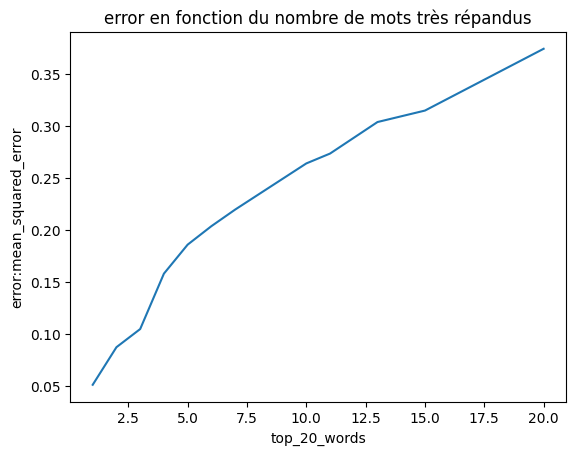

In [207]:

import matplotlib.pyplot as plt
plt.plot(top_numbers,errors)
plt.xlabel('top_20_words')
plt.ylabel('error:mean_squared_error')
plt.title('error en fonction du nombre de mots très répandus')